### PreProcess

In [39]:
import numpy as np 
import pandas as pd

In [40]:
train_df = pd.read_csv("./data/train.csv")

In [41]:
train_df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [42]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [43]:
train_df = train_df.drop('PassengerId',axis=1)

train_df['Cabin'] = train_df['Cabin'].str.strip()
train_df[['Cabin1', 'Cabin2', 'Cabin3']] = train_df['Cabin'].str.split('/', expand=True)
train_df = train_df.drop('Cabin',axis=1)

In [44]:
float_columns = list(train_df.select_dtypes(include=['float64']).columns)
object_columns = list(train_df.select_dtypes(include=['object', 'bool']).columns)

float_columns.append('Cabin2')
object_columns.remove('Cabin2')
object_columns.remove('Transported')

float_columns = pd.Index(float_columns)
object_columns = pd.Index(object_columns)

print(float_columns)
print(object_columns)

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Cabin2'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Cabin1',
       'Cabin3'],
      dtype='object')


In [45]:
train_df[float_columns] = train_df[float_columns].fillna(0)
train_df = train_df.fillna('NAN')
train_df[float_columns] = train_df[float_columns].astype('float64')
train_df[object_columns] = train_df[object_columns].astype('category')

In [46]:
train_df.info()
train_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8693 non-null   category
 1   CryoSleep     8693 non-null   category
 2   Destination   8693 non-null   category
 3   Age           8693 non-null   float64 
 4   VIP           8693 non-null   category
 5   RoomService   8693 non-null   float64 
 6   FoodCourt     8693 non-null   float64 
 7   ShoppingMall  8693 non-null   float64 
 8   Spa           8693 non-null   float64 
 9   VRDeck        8693 non-null   float64 
 10  Name          8693 non-null   category
 11  Transported   8693 non-null   bool    
 12  Cabin1        8693 non-null   category
 13  Cabin2        8693 non-null   float64 
 14  Cabin3        8693 non-null   category
dtypes: bool(1), category(7), float64(7)
memory usage: 877.3 KB


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin1,Cabin2,Cabin3
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S


In [47]:
X = train_df.drop('Transported',axis=1)
y = train_df['Transported']

### Visualize

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RoomService'}>,
        <Axes: title={'center': 'FoodCourt'}>],
       [<Axes: title={'center': 'ShoppingMall'}>,
        <Axes: title={'center': 'Spa'}>,
        <Axes: title={'center': 'VRDeck'}>],
       [<Axes: title={'center': 'Cabin2'}>, <Axes: >, <Axes: >]],
      dtype=object)

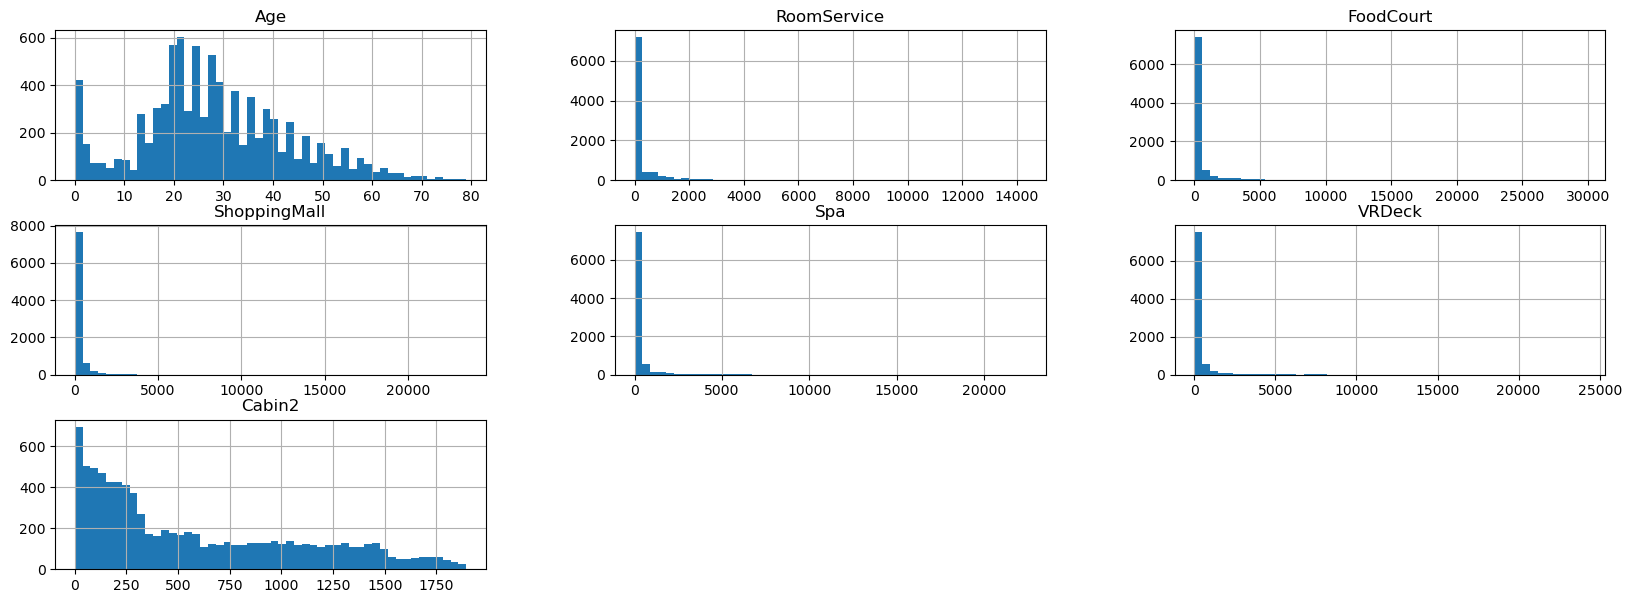

In [48]:
import matplotlib.pyplot as plt

train_df[float_columns].hist(bins=50, figsize=(20,7))

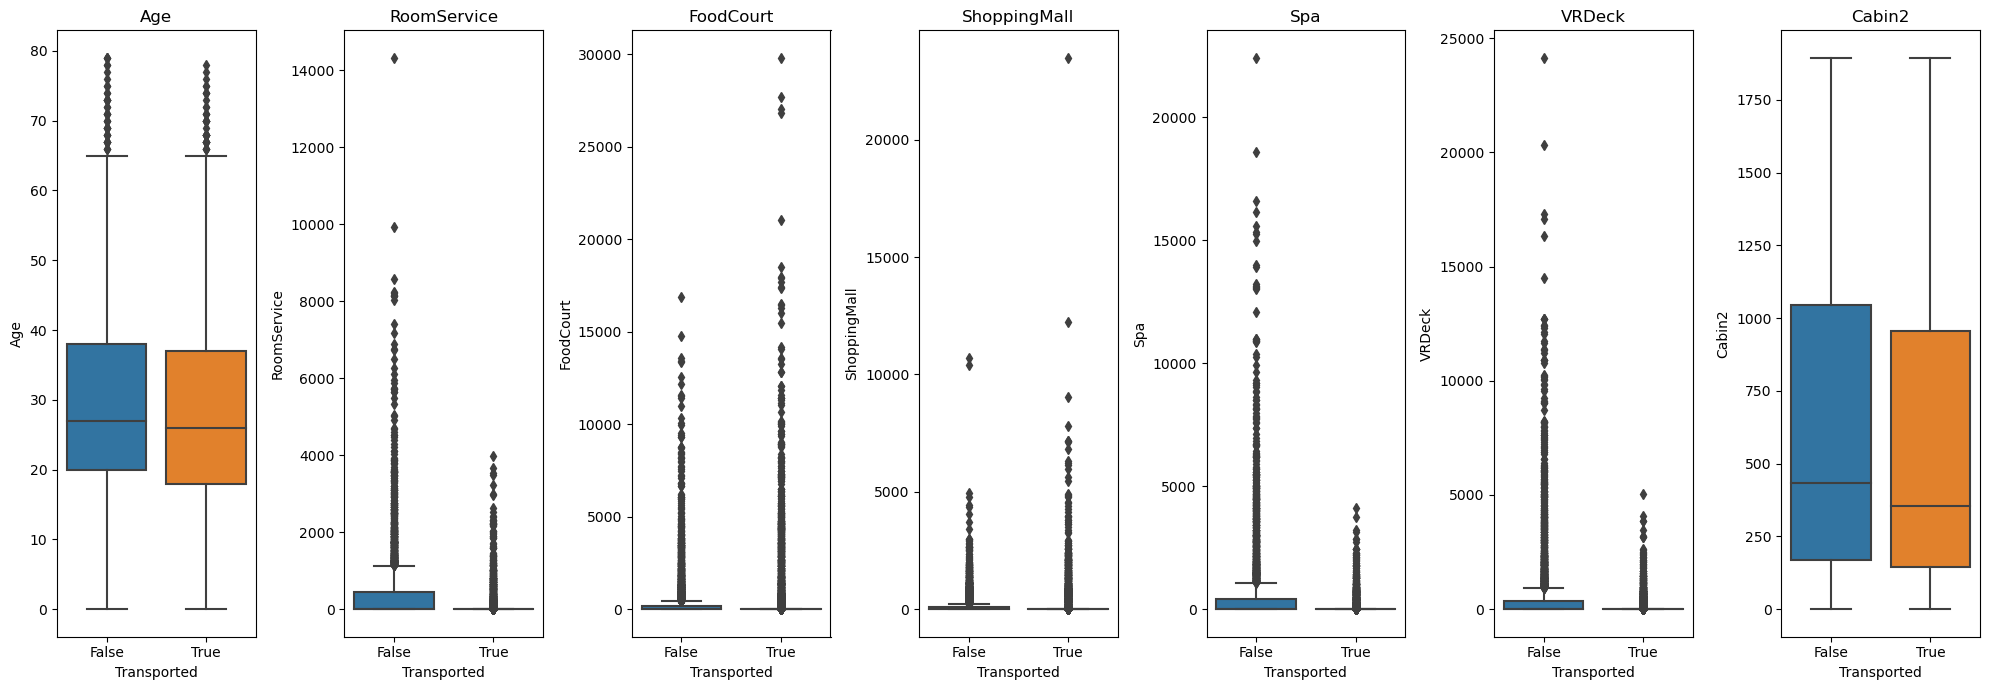

In [49]:
import seaborn as sns

fig,axes = plt.subplots(1,7,figsize=(20,7))

for ax, col in zip(axes.flat, float_columns):
    sns.boxplot(x='Transported', y=col, data=train_df, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

### Split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(6954, 14) (1739, 14) (6954,) (1739,)


### Model

In [52]:
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='Logloss', verbose=100)
model.fit(X, y, cat_features=list(object_columns), eval_set=(X_val, y_val))

0:	learn: 0.6458552	test: 0.6468141	best: 0.6468141 (0)	total: 192ms	remaining: 3m 11s
100:	learn: 0.3618922	test: 0.3992549	best: 0.3992221 (99)	total: 2.82s	remaining: 25.1s
200:	learn: 0.3231317	test: 0.3886699	best: 0.3886699 (200)	total: 5.6s	remaining: 22.3s
300:	learn: 0.2996356	test: 0.3868221	best: 0.3865852 (286)	total: 8.35s	remaining: 19.4s
400:	learn: 0.2780908	test: 0.3865338	best: 0.3860576 (369)	total: 11.7s	remaining: 17.5s
500:	learn: 0.2586535	test: 0.3874040	best: 0.3860576 (369)	total: 15.3s	remaining: 15.2s
600:	learn: 0.2401077	test: 0.3903447	best: 0.3860576 (369)	total: 18.6s	remaining: 12.3s
700:	learn: 0.2234722	test: 0.3924006	best: 0.3860576 (369)	total: 22.5s	remaining: 9.6s
800:	learn: 0.2110993	test: 0.3926541	best: 0.3860576 (369)	total: 26.7s	remaining: 6.63s
900:	learn: 0.1976676	test: 0.3967449	best: 0.3860576 (369)	total: 30.8s	remaining: 3.38s
999:	learn: 0.1859626	test: 0.3994314	best: 0.3860576 (369)	total: 35s	remaining: 0us

bestTest = 0.386057

In [59]:
test_df = pd.read_csv("./data/test.csv")
test_df = test_df.drop('PassengerId',axis=1)

test_df['Cabin'] = test_df['Cabin'].str.strip()
test_df[['Cabin1', 'Cabin2', 'Cabin3']] = test_df['Cabin'].str.split('/', expand=True)
test_df = test_df.drop('Cabin',axis=1)

float_columns = list(test_df.select_dtypes(include=['float64']).columns)
object_columns = list(test_df.select_dtypes(include=['object', 'bool']).columns)

float_columns.append('Cabin2')
object_columns.remove('Cabin2')

float_columns = pd.Index(float_columns)
object_columns = pd.Index(object_columns)

print(float_columns)
print(object_columns)

test_df[float_columns] = test_df[float_columns].fillna(0)
test_df = test_df.fillna('NAN')
test_df[float_columns] = test_df[float_columns].astype('float64')
test_df[object_columns] = test_df[object_columns].astype('category')

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Cabin2'],
      dtype='object')
Index(['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Cabin1',
       'Cabin3'],
      dtype='object')


In [60]:
test_df.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Cabin1,Cabin2,Cabin3
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S


In [61]:
y_pred = model.predict(test_df)

In [66]:
sample_submission = pd.read_csv('data/sample_submission.csv')
sample_submission['Transported'] = y_pred

In [67]:
sample_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [68]:
sample_submission.to_csv('./data/submission.csv', index=False)